# Machine Learning

_____

crucial part of Machine Learning <br>
Install tensorflow as below <br>- keras is part of tensorflow since a while 

$ conda install tensorflow <br>
https://keras.io/

## Packages

_____

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt



In [2]:
# Neural networks.
import tensorflow.keras as keras

In [3]:
# Horrible hack from: https://stackoverflow.com/a/53014308
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## Single Neuron

_____

## Single Input

_____

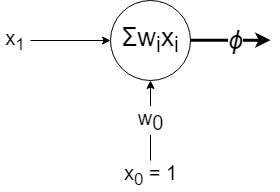

 $$y = mx + c$$
 $$ \\phi (x) = x $$
 $$ \\phi (w_1 x_1 + w_0 (1)) = w_1  x_1 + w_0 $$


In [4]:
# Identity activation function.
def identity(x):
    return x

In [5]:
# Firing a neuron.
def fire_neuron(x, w):
       return w[1] * x +w[0]

In [6]:
fire_neuron(1, [2, 0])

2

    takes value x as input
    above x =1
    pass in w as a list [w0,w1]
    [0] = 1st element in list. [1] next element etc
    i.e[2,0]; w[0]=2, w[1]=0
    hence (0*1)+2= 2

In [7]:
#this is all neurons do
# i.e. w0 is index 0= 2 therefore whatever factor wx is we will  add 2
# w1 is index 1.  In the array below thats 3.
# x is defined as 1 below.
# Thus from def fire neuron above:
#  = 1*3[W1] +2[W0]= 5
fire_neuron(1, [2, 3])

5

In [8]:
fire_neuron(4, [2, 3])

14

In [9]:
fire_neuron(5, [5, 5])

30

In [10]:
# starting listing x as a series of values
# treat x as a list

In [11]:
# if x and w are numpy arrays
# np.sum(x *w ) will work i.e. it will iterate through the list of x and w
# 1st value of  x has to be 1.0 at index 0
# x= np.array(1.0,4.0])
# w= np.array(2.0,3.0])

# x,w



In [12]:
x= np.array([1.0,4.0])
w= np.array([2.0,3.0])

x,w

(array([1., 4.]), array([2., 3.]))

In [13]:
# Firing a neuron.
# will multiply 1st value of x with first value of w etc
# 1st value of x has to always be 1 (xo) as depiced in the diagram
def fire_neuron(x, w):
    return(np.sum(x * w))

In [14]:
# to get phi wrap it into the function
# wrap output in phi
# can pass as function in as an argument to another function

In [15]:
# Identity activation function.
def identity(x):
    return x

In [16]:
# Identity activation function.  Could be e.g. square the value
#def identity(x):
    #return x**2

In [17]:
# hence can pass 'phi' as function in as an argument to another function

In [18]:
# Firing a neuron. with inputs passed in as x, w  and phi(identity function)
# inputs x, with weights of values w, and activation function
# need to supply a list of x values, weights and activation function
# our x values will be supplied as a dataset
# we want to be able to change the w's in some sort of systematic way
# so that eventually its trained to give us the representation of x and w values
# weights start mimicking the underlying relationship
# training of the function
def fire_neuron(x, w, phi):
    return phi(np.sum(x * w))

In [19]:
# Our x values - always has to have 1.0 at index 0.
x = np.array([1.0, 4.0])

# Our weights.
w = np.array([2.0, 3.0])

x, w

(array([1., 4.]), array([2., 3.]))

In [20]:
fire_neuron(x, w, identity)

14.0

## Data

_____

In [21]:
# Real-world input values.
data_in = np.arange(1.0, 13.0, 1.0)

data_in

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [22]:
# Real-world output values.
data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, len(data_in))

data_out

array([ 3.56409537,  8.38884893,  8.7411225 , 18.476107  , 20.8021232 ,
       25.76498014, 28.55693947, 31.53461384, 35.46511785, 39.34024808,
       44.29114998, 47.36531822])

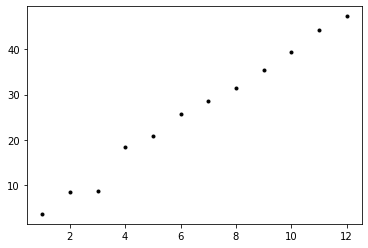

In [23]:
plt.plot(data_in, data_out, 'k.');

## Training

_____

In [24]:
# An index in the data set.
i = 5

In [25]:
# Actual input/output pair from the real world.
data_in[i], data_out[i]

(6.0, 25.764980140341486)

In [26]:
# Initial weights.
w =  np.array([0.0, 1.0])

# What the neuron currently outputs for the real-world input, based on current weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [27]:
# The goal is to create an algorithm that updates w to move the output towards the real output.
# Initial weights.
w =  np.array([0.0, 4.0])

# What the neuron could output for the real-world input, based on better weights.
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

24.0

## Cost

_____

In [28]:
# Usually use sum of squares.
def cost(w, x, phi, y):
    pred = fire_neuron(x, w, phi)
    return (y - pred)**2

In [29]:
# An index in the data set.
i = 5

In [30]:
# Cost of initial w.
w = np.array([0.0, 1.0])

cost(w, data_in[i], identity, data_out[i])

390.65443994809334

In [31]:
# Cost of a "better" w.
w = np.array([0.0, 4.0])

cost(w, data_in[i], identity, data_out[i])

3.11515489579985

## Training

_____

In [32]:
# Hyperparameter.
learning_rate = 0.001

In [33]:
def train_neuron(x, y, w, phi):
    # The possible adjustment to the weights.
    adjust = np.array([0.0, learning_rate])
    # Calculate the current cost.
    current = cost(w, x, phi, y)
    # Calculate the cost with slight adjustment to the weights.
    adding = cost(w + adjust, x, phi, y)
    # If the adjusted weights lower the cost, update the weights.
    if adding < current:
        w = w + adjust
    # Otherwise move in the other direction.
    else:
        w = w - adjust
    return w

In [34]:
# Set some initial weights.
w = np.array([0.0, 1.0])

In [35]:
# The training values.
data_in[i], data_out[i]

(6.0, 25.764980140341486)

In [36]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w, identity)

6.0

In [37]:
# Nudge the weights towards better values.
w_improved = train_neuron(data_in[i], data_out[i], w, identity)
w_improved

array([0.   , 1.001])

In [38]:
# Current neuron output for data_in[i].
fire_neuron(np.array([1.0, data_in[i]]), w_improved, identity)

6.005999999999999

In [39]:
# Set some initial weights.
w = np.array([0.0, 1.0])

# Loop several times.
for epoch in range(10000):
    for i in range(len(data_in)):
        w = train_neuron(data_in[i], data_out[i], w, identity)

# Show w.
w

array([0.   , 3.946])

## Using keras

_____

Using keras
https://github.com/keras-team/keras

In [40]:
# run through the steps with a nonesense dataset

In [41]:
# Importing keras (already installed above) - ERROR IF INSTALLED MORE THAN ONCE IN THE KERNEL
# import tensorflow.keras as keras

In [42]:
# Create a new sequential neural network.
# sequentilal means designing by sequentially add neurons in layers
model = keras.Sequential()

In [43]:
# Add a dense layer with 64 neurons and use the relu activation function.
# copied from github.com/keras-team/keras
# add to model above
# use dense.layer 
# 64 neurons will be calculated before the 10 neurons in the 2nd layer below
model.add(keras.layers.Dense(units=64, activation='relu'))

In [44]:
# Add a dense layer with 10 neurons and the softmax activation function.
# dense: every single of 10 neurons in 2nd layer will get an input from each of the 64 neurons in layer before it
# 640 conenctions each with their own weight 
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [45]:
# Compile the neural network.
# loss = 'categorical crossentropy'
# stacastic gradient descent - looks for local minimum
# loss is synonym for cost (cost function)
# keep an eye on metrics
# compile - make that into a nice package- i.e. build the graph in tensorflow
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [62]:
# Create a fake training data set.
# x and y are not related here
# needs 54 input data points
# output should be 10 data points
x_train = np.random.normal(0.0, 1.0, (100, 64))# 64 values coming in 100 times for the (input) X values
y_train = np.random.normal(0.5, 0.1, (100, 10))# 10 values coming out 100 times for the (output) Y values
y_train [9:10]

array([[0.40299073, 0.49106387, 0.51872249, 0.58900504, 0.49954213,
        0.57098032, 0.66619873, 0.48866093, 0.42226427, 0.64119596]])

In [47]:
# Train the neural network.
# we dont have x-train and y_train yet
# epoch = number of times the data passes through the graph
# batch size = take the data in batches of 32 and process them
# last batch might be  <32
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
4/4 [==============================] - 1s 9ms/step - loss: 13.3617 - accuracy: 0.1200
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 13.3014 - accuracy: 0.1200
Epoch 3/5
4/4 [==============================] - 0s 4ms/step - loss: 13.2503 - accuracy: 0.1000
Epoch 4/5
4/4 [==============================] - 0s 5ms/step - loss: 13.1945 - accuracy: 0.1000
Epoch 5/5
4/4 [==============================] - 0s 3ms/step - loss: 13.1483 - accuracy: 0.1100


In [48]:
# Create a fake training data set.
# needs 64 input data points
# output should be 10 data points
# run just 10 this time
x_test = np.random.normal(0.0, 1.0, (10, 64))
y_test = np.random.normal(0.5, 0.1, (10, 10))

In [49]:
# Evaluate the network.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

1/1 [==============================] - 0s 206ms/step - loss: 12.5779 - accuracy: 0.1000


In [50]:
# Make predictions for the test set.
classes = model.predict(x_test, batch_size=128)

1/1 [==============================] - 0s 204ms/step


In [51]:
classes

array([[0.12503451, 0.05798953, 0.14940919, 0.12070576, 0.03676819,
        0.10065651, 0.10376538, 0.20220333, 0.00795559, 0.09551205],
       [0.322917  , 0.03649949, 0.11823548, 0.03142679, 0.2736303 ,
        0.02227592, 0.0153126 , 0.09069201, 0.04325319, 0.0457572 ],
       [0.10638081, 0.06633671, 0.06760433, 0.19421662, 0.03852744,
        0.02568877, 0.01976704, 0.21178257, 0.07150237, 0.19819324],
       [0.13725051, 0.04150407, 0.1557899 , 0.14122583, 0.02197195,
        0.05512402, 0.02474058, 0.33381757, 0.04181137, 0.04676413],
       [0.21206552, 0.13249502, 0.07139026, 0.05544019, 0.12925418,
        0.13039912, 0.05329498, 0.13083631, 0.04586457, 0.03895989],
       [0.07857171, 0.17420253, 0.11166756, 0.06214906, 0.07142546,
        0.08865613, 0.06706198, 0.19756275, 0.06257002, 0.08613277],
       [0.18519358, 0.17925113, 0.03655316, 0.04711781, 0.12614715,
        0.04165002, 0.02787527, 0.22494933, 0.05117403, 0.08008853],
       [0.07614303, 0.33760184, 0.1053238

## Single Neuron in keras

_____

In [52]:
#CREATE A NEW MODEL AGAIN- SINGLE LAYER- ONE NEURON- NO ACTIVATION FUNCTION
# Create a new sequential neural network.
model = keras.Sequential()

In [53]:
# Add a dense layer with 1 neuron and the identity activation function.
model.add(keras.layers.Dense(units=1))

In [54]:
# Compile the neural network.
# loss function: keras loss functions - keras activation functions- google these
# provides loads of types of loss functions
# e.g. mean squared error function- computes the mean squared errors between labels and predictions
# loss takes diff of true and predicted y values squared
# could square root but not needed
# other: categorical CrossEntropy
# jiggle the network to get closer to weight values that minimise the cost/loss
#single layer-single neuron- has a bias

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [55]:
# Real-world input values.
# copy and paste data in and data out from above
# change the parameter to get hundreds of values
# range 1-13 in iterations of 0.01

data_in = np.arange(1.0, 13.0, 0.01)

# change shape
# different between 1d array in numpy and keras
# keras wants to supply it each value as a 2d array- one element in each row
# errors like this happen all the time in Keras
# difficulty is hard to get NN to work at all
# 1/2 battle is to get it working at all
# don't give up
# even if fixed might get garbage out

# https://stackoverflow.com/a/47468541
data_in = data_in.reshape(-1, 1)

data_in

array([[ 1.  ],
       [ 1.01],
       [ 1.02],
       ...,
       [12.97],
       [12.98],
       [12.99]])

In [56]:
# Real-world output values.
# generate the y = mx +C
# hope the keras model has learned the relationship between x * y (multiply the input x 4)
# in NN will never be able to pull out all the weights from the model
# i.e. 640 different weights 64 individual bias
# in real will have so many weights that have tiny nudges to the answer
# not possible to unwind and understand relevance of each one

data_out = 4.0 * data_in + np.random.normal(0.0, 1.0, data_in.shape)

data_out

array([[ 4.47977491],
       [ 3.67004502],
       [ 3.52419951],
       ...,
       [52.38306133],
       [51.47667635],
       [50.47724375]])

In [57]:
# Train the neural network.
model.fit(data_in, data_out, epochs=5, batch_size=32)

Epoch 1/5
38/38 [==============================] - 0s 2ms/step - loss: 16.2030 - accuracy: 0.0000e+00
Epoch 2/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0595 - accuracy: 0.0000e+00
Epoch 3/5
38/38 [==============================] - 0s 2ms/step - loss: 1.0347 - accuracy: 0.0000e+00
Epoch 4/5
38/38 [==============================] - 0s 1ms/step - loss: 1.0100 - accuracy: 0.0000e+00
Epoch 5/5
38/38 [==============================] - 0s 2ms/step - loss: 0.9888 - accuracy: 0.0000e+00


In [58]:
# Test input values.

# 1001 values
# reshape array
# run throigh the network
# values between -10 and + 20 (blue line in plot below)

data_test = np.linspace(-10.0, 20.0, 1001).reshape(-1, 1)

# Feed test values into neural network.
# preds = predicted values
# model is the keras model

preds = model.predict(data_test)

32/32 [==============================] - 0s 2ms/step


In [64]:
data_test.flatten()[0]

-10.0

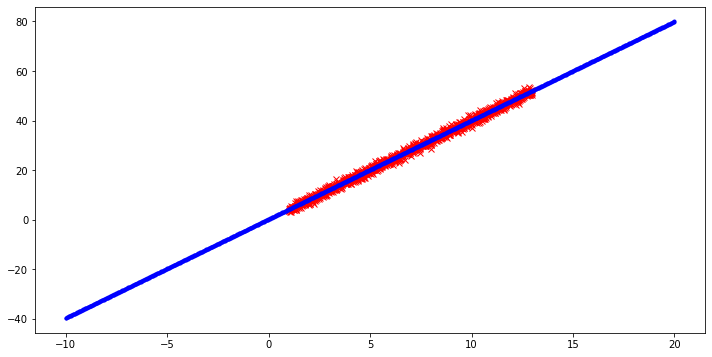

In [60]:
# Plot the values. (12*6 plot)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the original data set. (red x )
ax.plot(data_in.flatten(), data_out.flatten(), 'rx', label='Training')
 
# Plot the predicted data set. (blue dots)
ax.plot(data_test.flatten(), preds.flatten(), 'b.', label='Predictions');

# single neuron NN has learned the relationship betwwen x and Y
# can now do predictions on that
# keras can do this easy -declare sequential NN
# use loss function using  mean-squared error
# dont tell the neuron how we get from X to Y

_____

## End

